### **FARADISHA ALDINA PUTRI - 2141720159 - TI 3I**

## ***LAB Assignment - CNN***

**1. Modify the CNN model in lab work 2 to achieve a testing accuracy of more than 80%.**

- Import & Preprocessing Data

In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [22]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [23]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


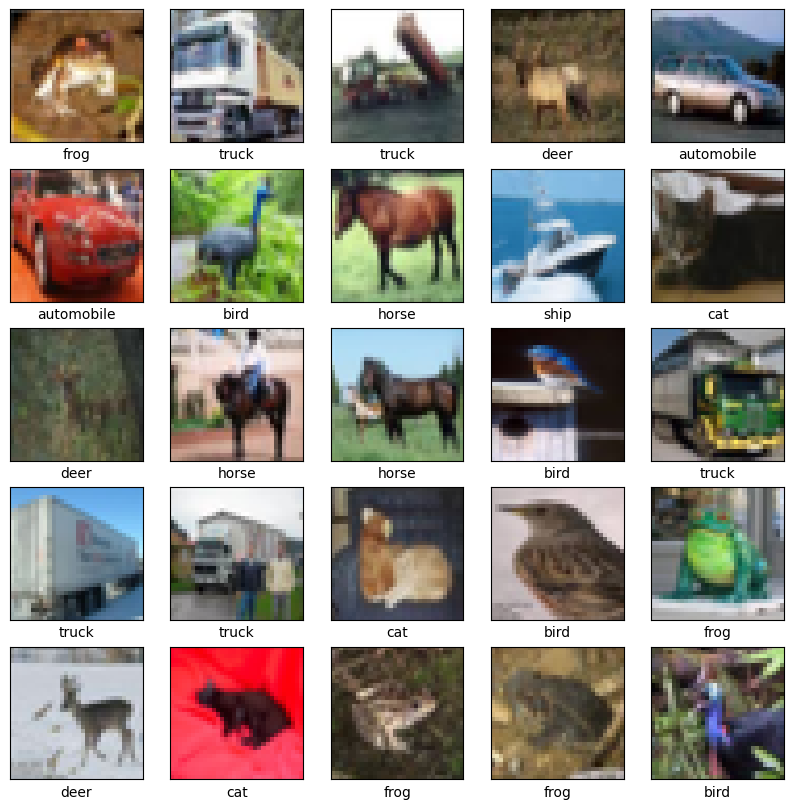

In [24]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[y_train[i][0]])
plt.show()


- Define Model

In [25]:
model = models.Sequential()

# First Convolution Layer
model.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

# Second Convolution Layer
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

#Third Convolution Layer
model.add(layers.Conv2D(128,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.4))

#Flattening
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(units = 10, activation = 'softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_30 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_30 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_31 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_31 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                    

In [26]:
model.compile(optimizer = "adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [27]:

history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 20s 11ms/step - loss: 1.6152 - accuracy: 0.4888 - val_loss: 1.3415 - val_accuracy: 0.5649
Epoch 2/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9849 - accuracy: 0.6616 - val_loss: 1.0215 - val_accuracy: 0.6622
Epoch 3/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8111 - accuracy: 0.7200 - val_loss: 0.7420 - val_accuracy: 0.7498
Epoch 4/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7016 - accuracy: 0.7545 - val_loss: 0.6508 - val_accuracy: 0.7736
Epoch 5/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6233 - accuracy: 0.7822 - val_loss: 0.6283 - val_accuracy: 0.7844
Epoch 6/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5720 - accuracy: 0.7999 - val_loss: 0.5503 - val_accuracy: 0.8104
Epoch 7/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5224 - accuracy: 0.8171 - val_loss: 0.5713 - val_a

- Evaluate Model

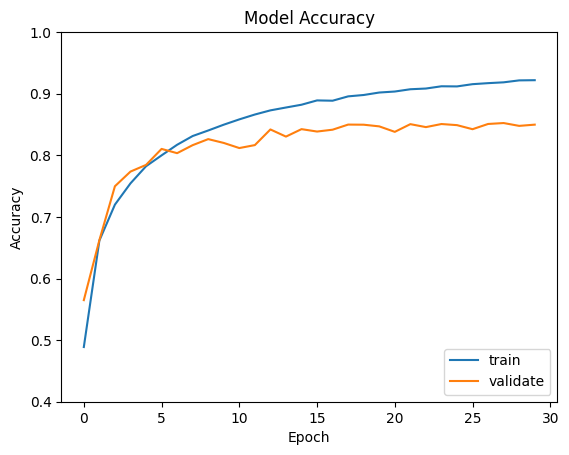

In [28]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')
plt.title("Model Accuracy")
plt.show()

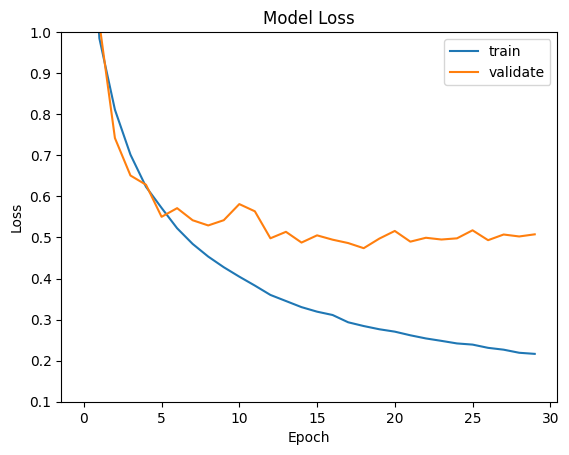

In [29]:

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.1, 1])
plt.legend(loc='upper right')
plt.title("Model Loss")
plt.show()

In [30]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')


313/313 - 1s - loss: 0.5076 - accuracy: 0.8498 - 1s/epoch - 5ms/step
Test Accuracy: 0.8497999906539917
Test Loss: 0.5076084136962891


### **Conclusion**

There is a difference in accuracy results in practicum 2 and task 1. In practicum 2, an accuracy of 70.78% was obtained, while in task 1 an accuracy of 84.97% was obtained. This can happen because:

1. **First Model (Practicum 2):**
   - Opts for Rectified Linear Unit (ReLU) activation functions.
   - Lacks Batch Normalization.
   - Omits Dropout layers.
   - Features a simpler architecture with two sets of convolutional layers, each followed by max-pooling.
   - Epoch : 10

2. **Second Model (Assignment 1):**
   - Utilizes Exponential Linear Unit (ELU) activation functions for convolutional layers.
   - Incorporates Batch Normalization after each convolutional layer.
   - Employs Dropout layers following max-pooling.
   - Features an architecture with three sets of convolutional layers, each followed by batch normalization, max-pooling, and dropout.
   - Epoch 30

The pooling strategies and the presence of a dense layer for classification also differ between the two models. Choosing between these models depends on the specific requirements and characteristics of the dataset, necessitating experimentation and potential hyperparameter tuning to determine the most effective architecture for a given task.

---

**2. Create a CNN model for classifying the MNIST dataset.**

- Import Library & Load Dataset

In [31]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras import layers
from keras import backend as k
from tensorflow.keras import layers, models

#Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


- Normalize Data

In [32]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

- Make CNN Model

In [33]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=inpx, activation='elu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='elu'))
model.add(layers.MaxPooling2D(pool_size=(3,3)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 8, 8, 64)          0         
                                                                 
 flatten_6 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               1048832   
                                                      

- Compile Model

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1467 - accuracy: 0.9557 - val_loss: 0.0545 - val_accuracy: 0.9835
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0569 - accuracy: 0.9821 - val_loss: 0.0449 - val_accuracy: 0.9851
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0390 - val_accuracy: 0.9874
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0339 - val_accuracy: 0.9886
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0290 - val_accuracy: 0.9900
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0387 - val_accuracy: 0.9880
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0381 - val_accuracy

- Evaluate Model

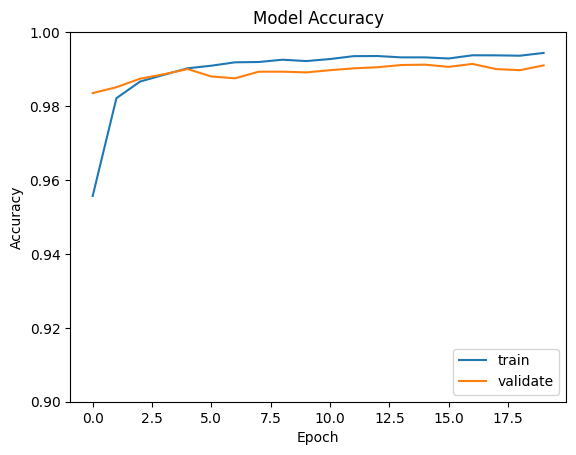

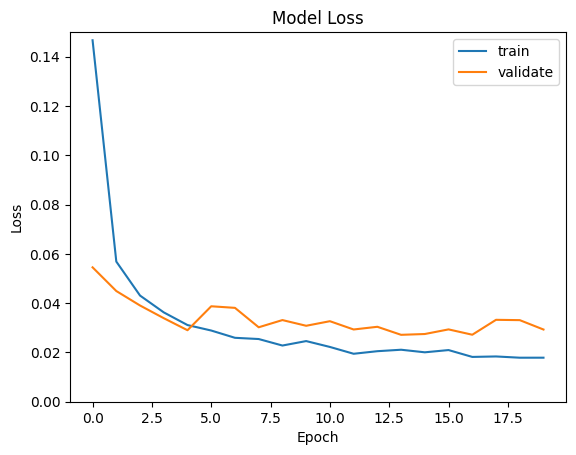

In [36]:
# Model Accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.title("Model Accuracy")
plt.show()

# Model Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.15])
plt.legend(loc='upper right')
plt.title("Model Loss")
plt.show()

In [37]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

313/313 - 1s - loss: 0.0293 - accuracy: 0.9910 - 719ms/epoch - 2ms/step
Test Accuracy: 0.9909999966621399
Test Loss: 0.029302002862095833


### **Conclusion**
Based on the generated output, the test accuracy obtained is 99.09%, with a test loss of 0.0293. This indicates that the model exhibits a very high level of accuracy and a low loss, suggesting its excellent ability to recognize and classify digits from the MNIST dataset.